## User Experience Analysis

In [ ]:
# import required packages and modules
import sys
sys.path.insert(0,'../scripts/')

import pandas as pd
import numpy as np
from numpy import percentile

import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load the cleaned dataset
df = pd.read_csv('../data/cleaned_telecom_data_source.csv', index_col=0)

In [ ]:
df.info()

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df.head(1)

### Task 3. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable):
- Average TCP retransmission
- Average RTT
- Handset type
- Average throughput



In [ ]:
old_df = pd.read_csv('../data/telecom_data_source.csv')
df['TCP DL Retrans. Vol (Bytes)'] = old_df['TCP DL Retrans. Vol (Bytes)']
df['TCP UL Retrans. Vol (Bytes)'] = old_df['TCP UL Retrans. Vol (Bytes)']

In [ ]:
# extracting only the required features from the dataframe
user_experience_df = df[["MSISDN/Number","Avg RTT DL (ms)","Avg RTT UL (ms)",
                         "Avg Bearer TP DL (kbps)","Avg Bearer TP UL (kbps)","Handset Type",
                         "TCP DL Retrans. Vol (Bytes)","TCP UL Retrans. Vol (Bytes)"]].copy()

In [ ]:
user_experience_df.info()

In [ ]:
user_experience_df['Total Avg RTT (ms)'] = user_experience_df['Avg RTT DL (ms)'] + \
                                      user_experience_df['Avg RTT DL (ms)']

user_experience_df['Total Avg Bearer TP (kbps)'] = user_experience_df['Avg Bearer TP DL (kbps)'] + \
                                      user_experience_df['Avg Bearer TP UL (kbps)']

user_experience_df['Total Avg TCP (Bytes)'] = user_experience_df['TCP DL Retrans. Vol (Bytes)'] + \
                                      user_experience_df['TCP DL Retrans. Vol (Bytes)']
user_experience_df.info()

In [ ]:
user_experience_agg = user_experience_df.groupby('MSISDN/Number').agg({
    'Total Avg RTT (ms)': 'sum',
    'Total Avg TCP (Bytes)': 'sum',
    'Total Avg Bearer TP (kbps)': 'sum',
    'Handset Type': [lambda x: x.mode()[0]]})

user_experience = pd.DataFrame(columns=[
    "Total Avg RTT (ms)",
    "Total Avg TCP (Bytes)",
    "Total Avg Bearer TP (kbps)",
    "Handset Type"])

user_experience["Total Avg RTT (ms)"] = user_experience_agg["Total Avg RTT (ms)"]['sum']
user_experience["Total Avg TCP (Bytes)"] = user_experience_agg["Total Avg TCP (Bytes)"]['sum']
user_experience["Total Avg Bearer TP (kbps)"] = user_experience_agg["Total Avg Bearer TP (kbps)"]['sum']
user_experience["Handset Type"] = user_experience_agg["Handset Type"]['<lambda>']
user_experience.head()

### Task 3.2 - Compute & list 10 of the top, bottom and most frequent:
- TCP values in the dataset. 
- RTT values in the dataset.
- Throughput values in the dataset.

In [ ]:
# Sort Dataset by TCP Values 
sorted_by_tcp = user_experience_df.sort_values('Total Avg TCP (Bytes)', ascending=False)
top_10 = sorted_by_tcp.head(10)['Total Avg TCP (Bytes)']
last_10 = sorted_by_tcp.tail(10)['Total Avg TCP (Bytes)']
most_10 = user_experience_df['Total Avg TCP (Bytes)'].value_counts().head(10)

In [ ]:
from data_plots import plot_mult_hist
plot_mult_hist([top_10, last_10, most_10], 1,
          3, "TCP values in the dataset", ['Top 10', 'Last 10', 'Most 10'])

In [109]:
# Sort Dataset by RTT Values 
sorted_by_RTT = user_experience_df.sort_values(
    'Total Avg RTT (ms)', ascending=False)
top_10 = sorted_by_RTT.head(10)['Total Avg RTT (ms)']
last_10 = sorted_by_RTT.tail(10)['Total Avg RTT (ms)']
most_10 = user_experience_df['Total Avg RTT (ms)'].value_counts().head(10)

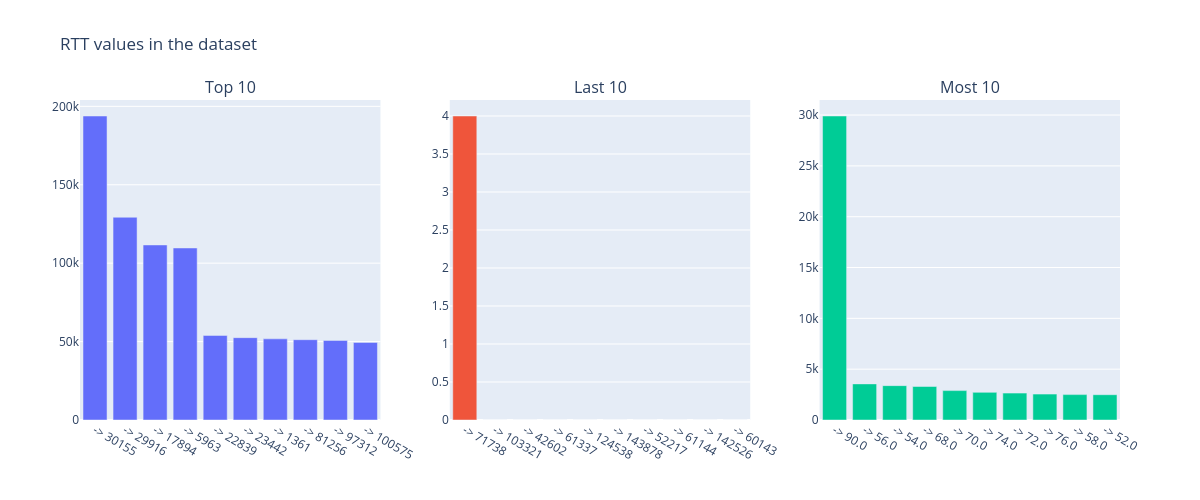

In [110]:
plot_mult_hist([top_10, last_10, most_10, top_10], 1,
          3, "RTT values in the dataset", ['Top 10', 'Last 10', 'Most 10'])

In [111]:
# Sort Dataset by Throughput Values 
sorted_by_Bearer_TP = user_experience_df.sort_values(
    'Total Avg Bearer TP (kbps)', ascending=False)
top_10 = sorted_by_Bearer_TP.head(10)['Total Avg Bearer TP (kbps)']
last_10 = sorted_by_Bearer_TP.tail(10)['Total Avg Bearer TP (kbps)']
most_10 = user_experience_df['Total Avg Bearer TP (kbps)'].value_counts().head(10)

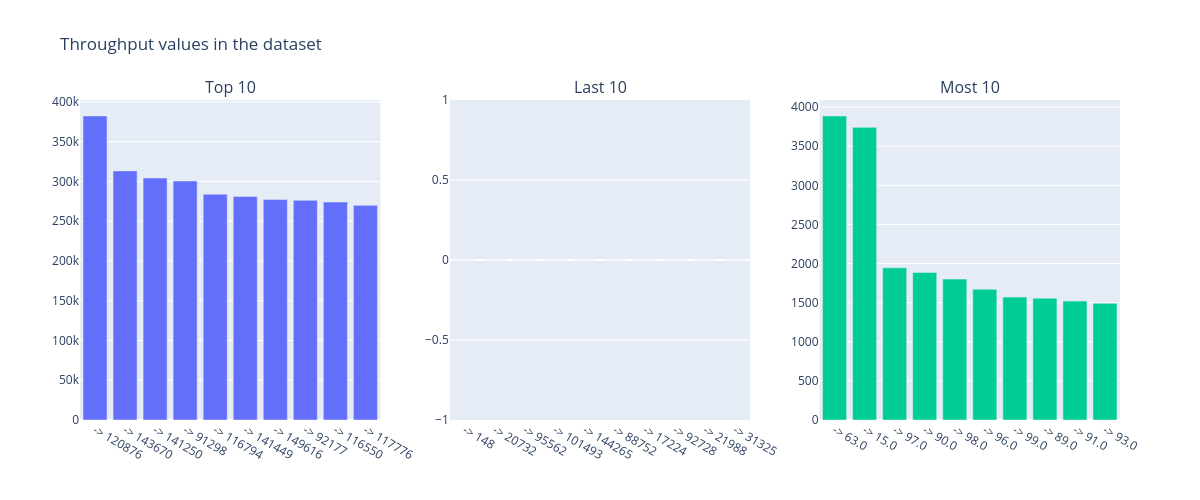

In [112]:
plot_mult_hist([top_10, last_10, most_10, top_10], 1,
          3, "Throughput values in the dataset", ['Top 10', 'Last 10', 'Most 10'])

### Task 3.3 - Compute & report:
The distribution of the average throughput  per handset type and provide interpretation for your findings.
The average TCP retransmission view per handset type and provide interpretation for your findings.


### Task 3.4 - Using the experience metrics above, 
- perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. 
- (The description must define each group based on your understanding of the data)